## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 1.0131156	total: 58.7ms	remaining: 58.7s
1:	learn: 0.9922812	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9717051	total: 61ms	remaining: 20.3s
3:	learn: 0.9540888	total: 62.2ms	remaining: 15.5s
4:	learn: 0.9377303	total: 63.2ms	remaining: 12.6s
5:	learn: 0.9207550	total: 64.4ms	remaining: 10.7s
6:	learn: 0.9054919	total: 65.4ms	remaining: 9.27s
7:	learn: 0.8882354	total: 66.3ms	remaining: 8.21s
8:	learn: 0.8728622	total: 67.2ms	remaining: 7.4s
9:	learn: 0.8555594	total: 68.1ms	remaining: 6.74s
10:	learn: 0.8427537	total: 69ms	remaining: 6.2s
11:	learn: 0.8282558	total: 69.8ms	remaining: 5.75s
12:	learn: 0.8127358	total: 70.7ms	remaining: 5.37s
13:	learn: 0.7977038	total: 71.6ms	remaining: 5.04s
14:	learn: 0.7836349	total: 72.5ms	remaining: 4.76s
15:	learn: 0.7705760	total: 73.4ms	remaining: 4.51s
16:	learn: 0.7569676	total: 74.3ms	remaining: 4.3s
17:	learn: 0.7444021	total: 75.2ms	remaining: 4.1s
18:	learn: 0.7322033	total: 76ms	remaining: 3.92s
19

58:	learn: 0.4351226	total: 108ms	remaining: 1.73s
59:	learn: 0.4314628	total: 109ms	remaining: 1.71s
60:	learn: 0.4267773	total: 110ms	remaining: 1.7s
61:	learn: 0.4218492	total: 111ms	remaining: 1.68s
62:	learn: 0.4180684	total: 112ms	remaining: 1.66s
63:	learn: 0.4132179	total: 112ms	remaining: 1.65s
64:	learn: 0.4095899	total: 113ms	remaining: 1.63s
65:	learn: 0.4056997	total: 114ms	remaining: 1.61s
66:	learn: 0.4024248	total: 115ms	remaining: 1.6s
67:	learn: 0.3994845	total: 116ms	remaining: 1.58s
68:	learn: 0.3958054	total: 116ms	remaining: 1.57s
69:	learn: 0.3915927	total: 117ms	remaining: 1.56s
70:	learn: 0.3875902	total: 118ms	remaining: 1.54s
71:	learn: 0.3848175	total: 119ms	remaining: 1.53s
72:	learn: 0.3818728	total: 120ms	remaining: 1.52s
73:	learn: 0.3779578	total: 120ms	remaining: 1.51s
74:	learn: 0.3744348	total: 121ms	remaining: 1.5s
75:	learn: 0.3718912	total: 122ms	remaining: 1.48s
76:	learn: 0.3680169	total: 123ms	remaining: 1.47s
77:	learn: 0.3654398	total: 124ms	

160:	learn: 0.2447445	total: 192ms	remaining: 1s
161:	learn: 0.2438989	total: 193ms	remaining: 999ms
162:	learn: 0.2433823	total: 194ms	remaining: 996ms
163:	learn: 0.2427227	total: 195ms	remaining: 993ms
164:	learn: 0.2417420	total: 196ms	remaining: 990ms
165:	learn: 0.2410413	total: 196ms	remaining: 987ms
166:	learn: 0.2402658	total: 197ms	remaining: 984ms
167:	learn: 0.2394483	total: 198ms	remaining: 981ms
168:	learn: 0.2389661	total: 199ms	remaining: 978ms
169:	learn: 0.2383336	total: 200ms	remaining: 975ms
170:	learn: 0.2377685	total: 201ms	remaining: 972ms
171:	learn: 0.2372751	total: 201ms	remaining: 969ms
172:	learn: 0.2365193	total: 202ms	remaining: 967ms
173:	learn: 0.2359215	total: 203ms	remaining: 964ms
174:	learn: 0.2353791	total: 204ms	remaining: 961ms
175:	learn: 0.2347076	total: 205ms	remaining: 957ms
176:	learn: 0.2339047	total: 205ms	remaining: 955ms
177:	learn: 0.2332551	total: 206ms	remaining: 952ms
178:	learn: 0.2328269	total: 207ms	remaining: 950ms
179:	learn: 0.2

285:	learn: 0.1793235	total: 299ms	remaining: 746ms
286:	learn: 0.1787793	total: 300ms	remaining: 745ms
287:	learn: 0.1782319	total: 301ms	remaining: 744ms
288:	learn: 0.1777573	total: 302ms	remaining: 742ms
289:	learn: 0.1773931	total: 302ms	remaining: 741ms
290:	learn: 0.1770607	total: 303ms	remaining: 739ms
291:	learn: 0.1768565	total: 304ms	remaining: 738ms
292:	learn: 0.1765289	total: 305ms	remaining: 736ms
293:	learn: 0.1760707	total: 306ms	remaining: 735ms
294:	learn: 0.1756062	total: 307ms	remaining: 733ms
295:	learn: 0.1750899	total: 308ms	remaining: 731ms
296:	learn: 0.1746921	total: 308ms	remaining: 730ms
297:	learn: 0.1743107	total: 309ms	remaining: 728ms
298:	learn: 0.1737781	total: 310ms	remaining: 726ms
299:	learn: 0.1733777	total: 311ms	remaining: 725ms
300:	learn: 0.1731134	total: 311ms	remaining: 723ms
301:	learn: 0.1728968	total: 312ms	remaining: 722ms
302:	learn: 0.1723880	total: 313ms	remaining: 720ms
303:	learn: 0.1719185	total: 314ms	remaining: 719ms
304:	learn: 

386:	learn: 0.1473225	total: 382ms	remaining: 605ms
387:	learn: 0.1470432	total: 383ms	remaining: 604ms
388:	learn: 0.1467592	total: 384ms	remaining: 603ms
389:	learn: 0.1465451	total: 385ms	remaining: 602ms
390:	learn: 0.1462729	total: 385ms	remaining: 600ms
391:	learn: 0.1459915	total: 386ms	remaining: 599ms
392:	learn: 0.1459135	total: 387ms	remaining: 598ms
393:	learn: 0.1455780	total: 388ms	remaining: 596ms
394:	learn: 0.1455107	total: 389ms	remaining: 595ms
395:	learn: 0.1452767	total: 390ms	remaining: 594ms
396:	learn: 0.1451765	total: 390ms	remaining: 593ms
397:	learn: 0.1448766	total: 391ms	remaining: 592ms
398:	learn: 0.1445410	total: 392ms	remaining: 590ms
399:	learn: 0.1442295	total: 393ms	remaining: 589ms
400:	learn: 0.1438872	total: 394ms	remaining: 588ms
401:	learn: 0.1436799	total: 394ms	remaining: 587ms
402:	learn: 0.1435874	total: 395ms	remaining: 585ms
403:	learn: 0.1434544	total: 396ms	remaining: 584ms
404:	learn: 0.1431633	total: 397ms	remaining: 583ms
405:	learn: 

515:	learn: 0.1180949	total: 489ms	remaining: 459ms
516:	learn: 0.1180570	total: 490ms	remaining: 458ms
517:	learn: 0.1177405	total: 491ms	remaining: 457ms
518:	learn: 0.1175613	total: 492ms	remaining: 456ms
519:	learn: 0.1174537	total: 493ms	remaining: 455ms
520:	learn: 0.1172852	total: 493ms	remaining: 454ms
521:	learn: 0.1169751	total: 494ms	remaining: 452ms
522:	learn: 0.1168361	total: 495ms	remaining: 451ms
523:	learn: 0.1167951	total: 496ms	remaining: 450ms
524:	learn: 0.1165946	total: 497ms	remaining: 449ms
525:	learn: 0.1162851	total: 497ms	remaining: 448ms
526:	learn: 0.1162530	total: 498ms	remaining: 447ms
527:	learn: 0.1159725	total: 499ms	remaining: 446ms
528:	learn: 0.1156986	total: 500ms	remaining: 445ms
529:	learn: 0.1154983	total: 501ms	remaining: 444ms
530:	learn: 0.1152079	total: 502ms	remaining: 443ms
531:	learn: 0.1150586	total: 502ms	remaining: 442ms
532:	learn: 0.1149083	total: 503ms	remaining: 441ms
533:	learn: 0.1146539	total: 504ms	remaining: 440ms
534:	learn: 

617:	learn: 0.1001857	total: 573ms	remaining: 354ms
618:	learn: 0.1000836	total: 574ms	remaining: 353ms
619:	learn: 0.0999583	total: 575ms	remaining: 352ms
620:	learn: 0.0997687	total: 576ms	remaining: 351ms
621:	learn: 0.0996832	total: 577ms	remaining: 350ms
622:	learn: 0.0995031	total: 577ms	remaining: 349ms
623:	learn: 0.0993933	total: 578ms	remaining: 348ms
624:	learn: 0.0991951	total: 579ms	remaining: 347ms
625:	learn: 0.0991082	total: 580ms	remaining: 346ms
626:	learn: 0.0989644	total: 581ms	remaining: 345ms
627:	learn: 0.0987628	total: 581ms	remaining: 344ms
628:	learn: 0.0985256	total: 582ms	remaining: 343ms
629:	learn: 0.0983689	total: 583ms	remaining: 342ms
630:	learn: 0.0983497	total: 584ms	remaining: 341ms
631:	learn: 0.0982886	total: 585ms	remaining: 340ms
632:	learn: 0.0981208	total: 585ms	remaining: 339ms
633:	learn: 0.0979237	total: 586ms	remaining: 338ms
634:	learn: 0.0977657	total: 587ms	remaining: 337ms
635:	learn: 0.0977359	total: 588ms	remaining: 336ms
636:	learn: 

747:	learn: 0.0834003	total: 679ms	remaining: 229ms
748:	learn: 0.0832630	total: 680ms	remaining: 228ms
749:	learn: 0.0831190	total: 681ms	remaining: 227ms
750:	learn: 0.0831072	total: 682ms	remaining: 226ms
751:	learn: 0.0829629	total: 683ms	remaining: 225ms
752:	learn: 0.0828849	total: 684ms	remaining: 224ms
753:	learn: 0.0827032	total: 684ms	remaining: 223ms
754:	learn: 0.0825810	total: 685ms	remaining: 222ms
755:	learn: 0.0824798	total: 686ms	remaining: 221ms
756:	learn: 0.0823041	total: 687ms	remaining: 220ms
757:	learn: 0.0821198	total: 687ms	remaining: 219ms
758:	learn: 0.0820590	total: 688ms	remaining: 219ms
759:	learn: 0.0819098	total: 689ms	remaining: 218ms
760:	learn: 0.0817872	total: 690ms	remaining: 217ms
761:	learn: 0.0816100	total: 691ms	remaining: 216ms
762:	learn: 0.0815165	total: 692ms	remaining: 215ms
763:	learn: 0.0814153	total: 692ms	remaining: 214ms
764:	learn: 0.0811989	total: 693ms	remaining: 213ms
765:	learn: 0.0810811	total: 694ms	remaining: 212ms
766:	learn: 

844:	learn: 0.0735678	total: 763ms	remaining: 140ms
845:	learn: 0.0733974	total: 764ms	remaining: 139ms
846:	learn: 0.0732820	total: 765ms	remaining: 138ms
847:	learn: 0.0732721	total: 766ms	remaining: 137ms
848:	learn: 0.0731677	total: 767ms	remaining: 136ms
849:	learn: 0.0730498	total: 767ms	remaining: 135ms
850:	learn: 0.0729460	total: 768ms	remaining: 135ms
851:	learn: 0.0727852	total: 769ms	remaining: 134ms
852:	learn: 0.0727192	total: 770ms	remaining: 133ms
853:	learn: 0.0726145	total: 771ms	remaining: 132ms
854:	learn: 0.0725300	total: 772ms	remaining: 131ms
855:	learn: 0.0724468	total: 773ms	remaining: 130ms
856:	learn: 0.0723544	total: 773ms	remaining: 129ms
857:	learn: 0.0722638	total: 774ms	remaining: 128ms
858:	learn: 0.0722212	total: 775ms	remaining: 127ms
859:	learn: 0.0721558	total: 776ms	remaining: 126ms
860:	learn: 0.0720723	total: 777ms	remaining: 125ms
861:	learn: 0.0719973	total: 778ms	remaining: 125ms
862:	learn: 0.0719389	total: 780ms	remaining: 124ms
863:	learn: 

942:	learn: 0.0651681	total: 870ms	remaining: 52.6ms
943:	learn: 0.0650820	total: 872ms	remaining: 51.7ms
944:	learn: 0.0649483	total: 873ms	remaining: 50.8ms
945:	learn: 0.0648888	total: 874ms	remaining: 49.9ms
946:	learn: 0.0648165	total: 875ms	remaining: 49ms
947:	learn: 0.0647568	total: 876ms	remaining: 48.1ms
948:	learn: 0.0646842	total: 878ms	remaining: 47.2ms
949:	learn: 0.0645819	total: 880ms	remaining: 46.3ms
950:	learn: 0.0645082	total: 881ms	remaining: 45.4ms
951:	learn: 0.0644031	total: 884ms	remaining: 44.6ms
952:	learn: 0.0643647	total: 896ms	remaining: 44.2ms
953:	learn: 0.0642343	total: 908ms	remaining: 43.8ms
954:	learn: 0.0642189	total: 909ms	remaining: 42.8ms
955:	learn: 0.0641751	total: 910ms	remaining: 41.9ms
956:	learn: 0.0640837	total: 912ms	remaining: 41ms
957:	learn: 0.0640652	total: 914ms	remaining: 40.1ms
958:	learn: 0.0640105	total: 915ms	remaining: 39.1ms
959:	learn: 0.0638697	total: 916ms	remaining: 38.2ms
960:	learn: 0.0637213	total: 917ms	remaining: 37.2

994:	learn: 0.0607027	total: 953ms	remaining: 4.79ms
995:	learn: 0.0606342	total: 955ms	remaining: 3.83ms
996:	learn: 0.0605615	total: 956ms	remaining: 2.88ms
997:	learn: 0.0604726	total: 958ms	remaining: 1.92ms
998:	learn: 0.0603937	total: 959ms	remaining: 960us
999:	learn: 0.0603006	total: 961ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

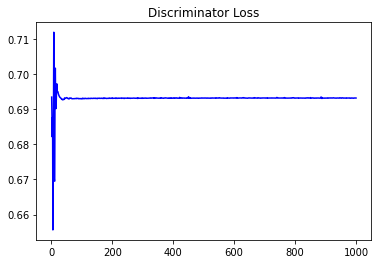

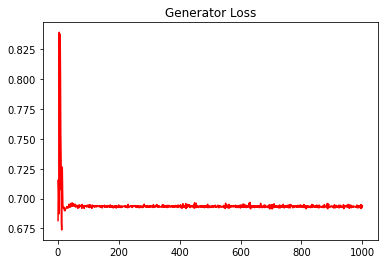

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15846692044485877


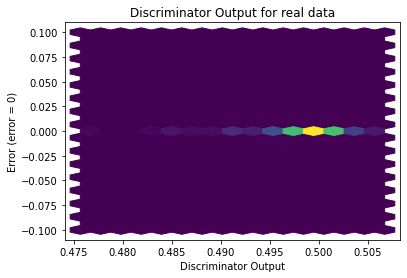

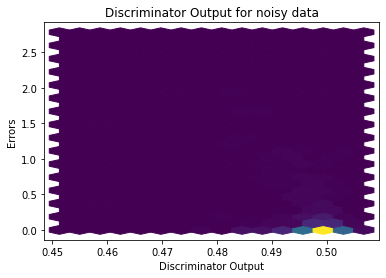

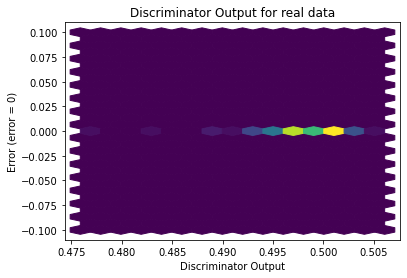

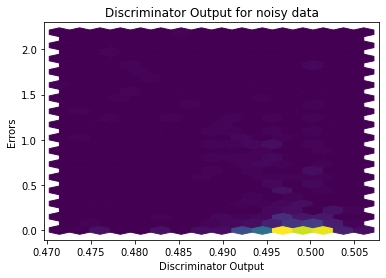

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


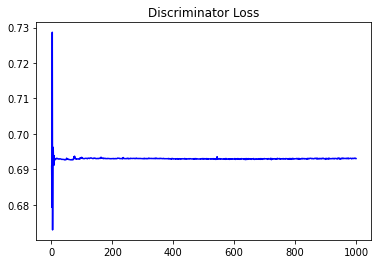

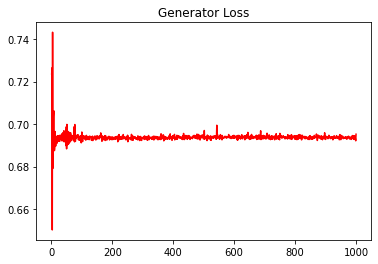

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.12420182834116318


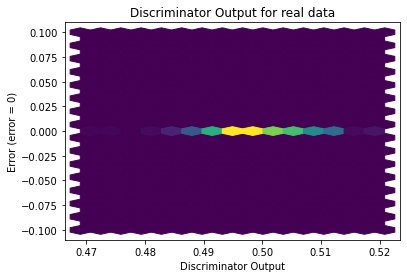

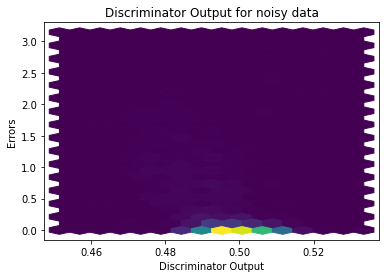

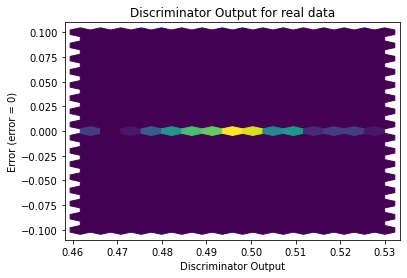

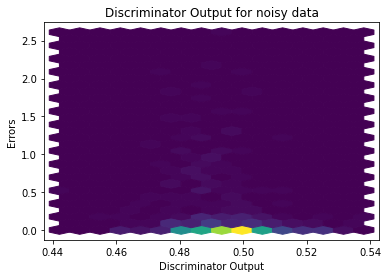

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1535]], requires_grad=True)
